In [1]:
import numpy as np
import pandas as pd
import keijzer_exogan as ke
import glob
import copy
import seaborn as sns
import math

import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
path = '/datb/16011015/MakeAI'

# file paths
trans_ = glob.glob(path+'/*/trans')
params_ = glob.glob(path+'/*/parameters')
ariels = glob.glob(path+'/*/contr_trans_ARIEL')

In [3]:
# create all ASPAs
aspas = []
for i in tqdm(range(len(trans_))):
    trans_file = trans_[i]
    params_file = params_[i]
    ariels_file = ariels[i]

    aspa = ke.ASPA_complex_v1(trans_file, params_file, ariels_file)
    aspa = aspa.reshape(1,32,32)
    
    aspas.append(aspa)

100%|██████████| 2340/2340 [12:18<00:00,  3.13it/s]


In [4]:
%%time 
images = np.array(aspas)

CPU times: user 12.2 ms, sys: 7.97 ms, total: 20.2 ms
Wall time: 19.3 ms


In [5]:
images.shape

(2340, 1, 32, 32)

In [7]:
%%time
np.random.shuffle(images)

np.save(path+'/ASPAs/MakeAI_train.npy', images[:2000])
np.save(path+'/ASPAs/MakeAI_test.npy', images[2000:])

CPU times: user 2.68 ms, sys: 23.9 ms, total: 26.6 ms
Wall time: 25.6 ms


# Visualize

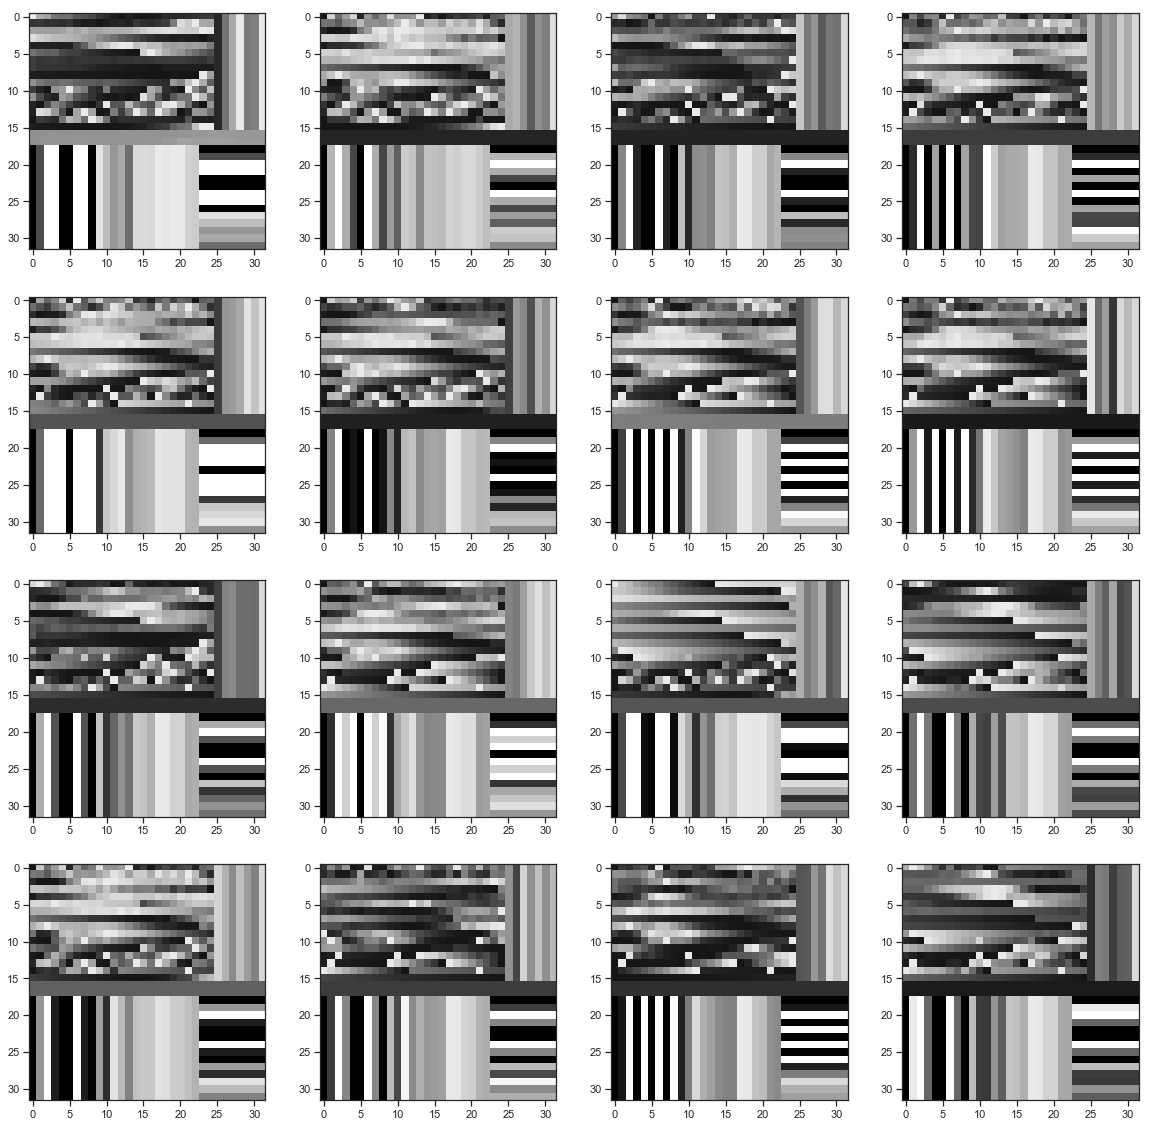

In [15]:
plt.figure(figsize=(20,20))

for i in range(4*4):
    aspa = images[i, 0]
    plt.subplot(4,4,i+1)
    plt.imshow(aspa, cmap='gray', vmin=-1.2, vmax=1.2)